# Importing library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

# Finding local minimum using Gradient Descent

In [2]:
def local_minimum(function, derivative, alpha = 0.01, precision = 0.0001, max_iterations = 100000, Range = 10 ** 1, plot = False):
    """
    Takes function and its derivative and return the local minimum.
    """
    x_coordinates = np.linspace(-1 * Range, Range, num = 10 * Range) 
    x = random.uniform(-1 * Range, 1 * Range)
    number_of_iterations = 0
    
    while number_of_iterations == 0 or (abs(x - x_old) > precision and abs(x) < Range and number_of_iterations < max_iterations):
        number_of_iterations += 1
        x_old = x
        x = x - alpha * derivative(x)
        if plot:
            plt.plot(x_coordinates, np.apply_along_axis(np.vectorize(function), 0, x_coordinates), 'b')
            plt.plot(x, function(x), 'r+')
            plt.show()
         
    return x, number_of_iterations

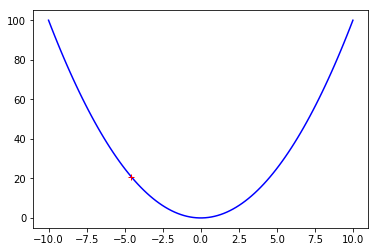

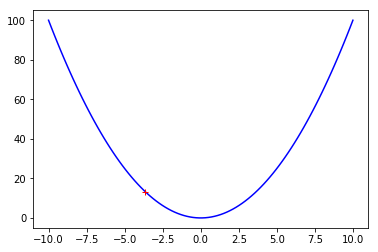

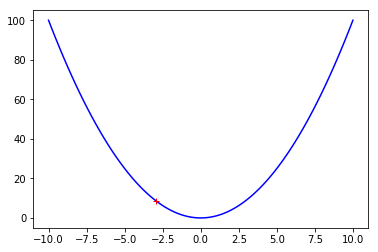

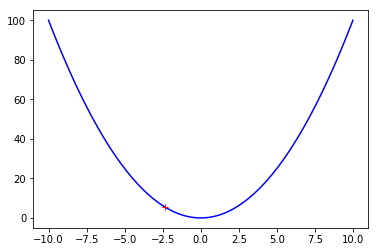

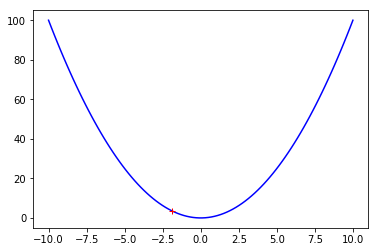

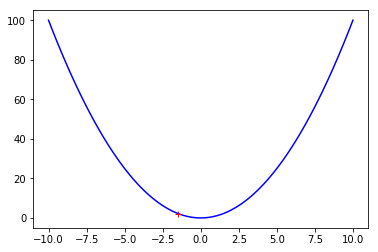

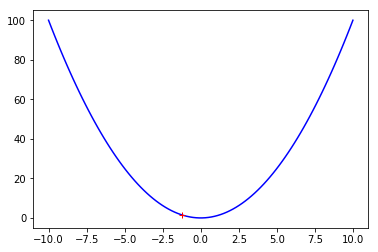

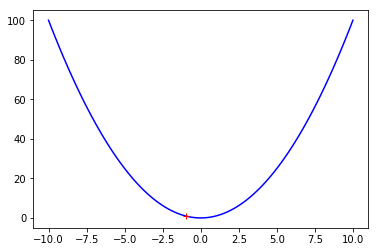

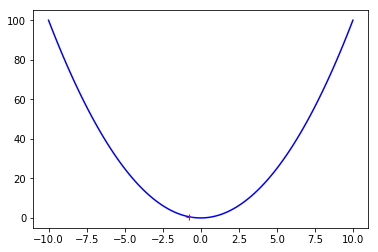

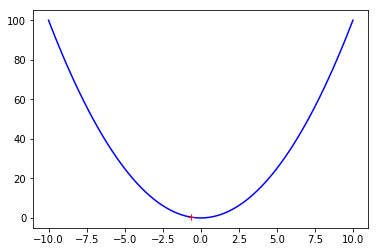

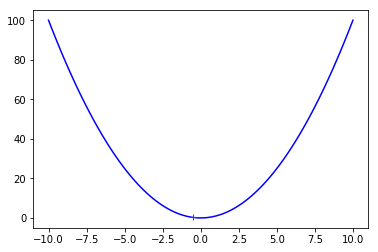

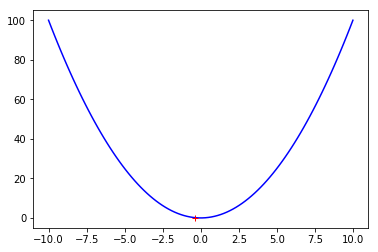

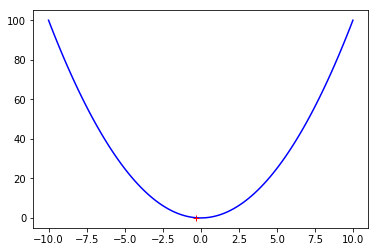

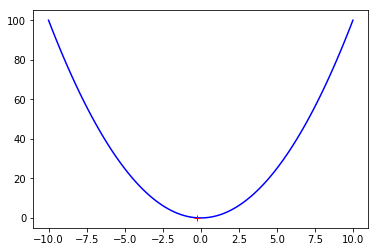

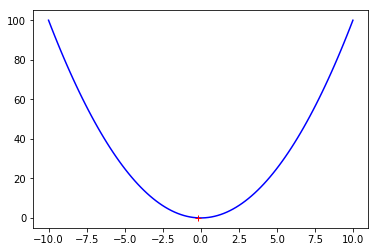

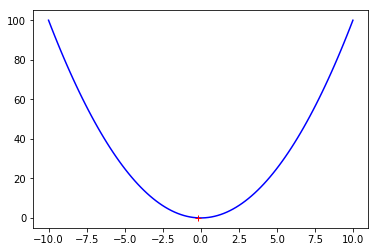

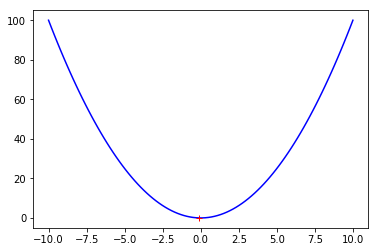

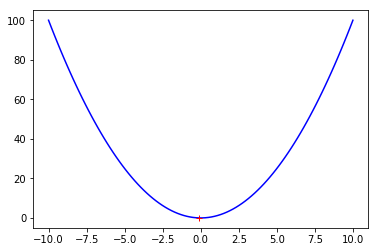

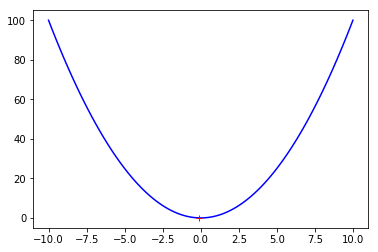

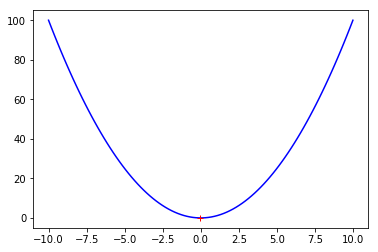

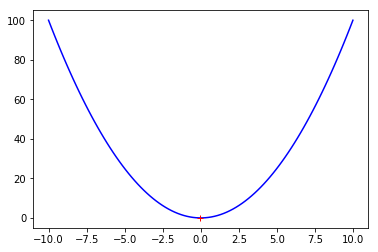

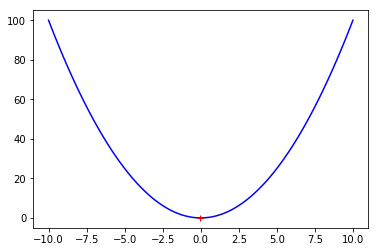

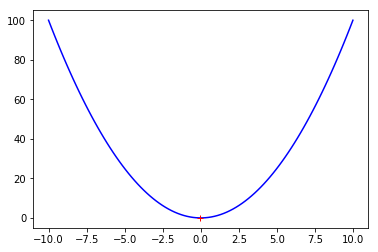

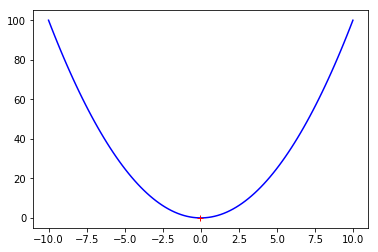

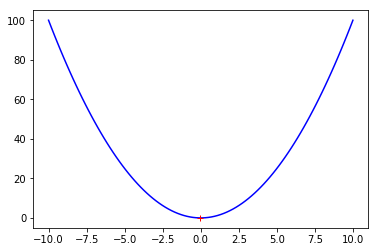

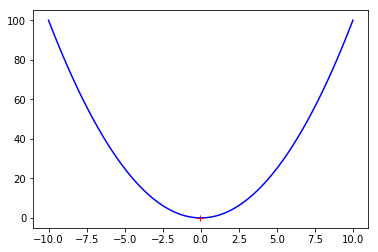

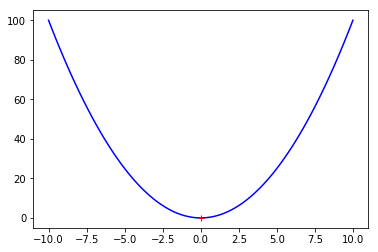

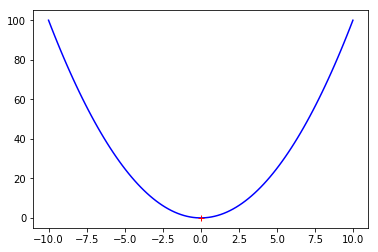

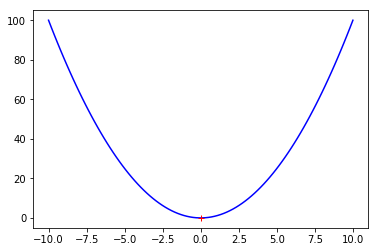

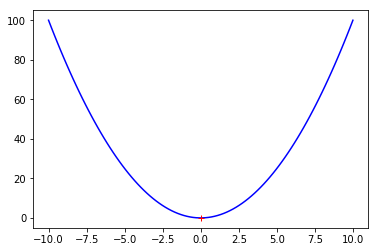

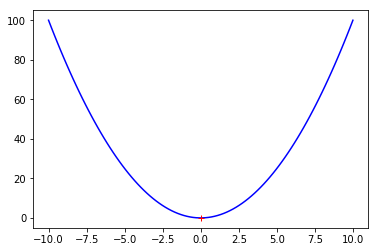

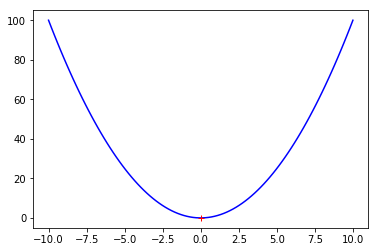

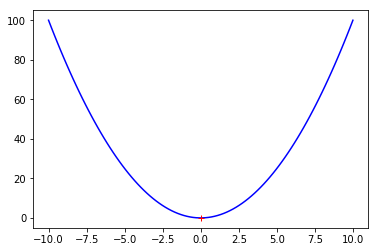

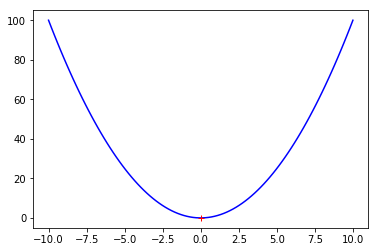

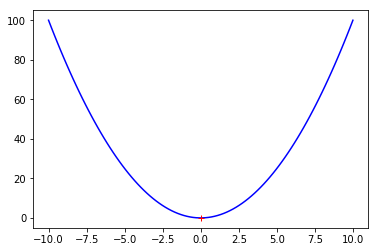

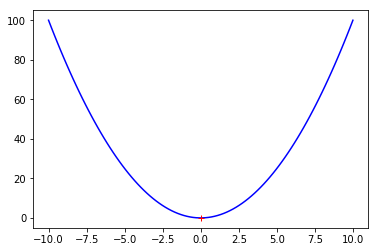

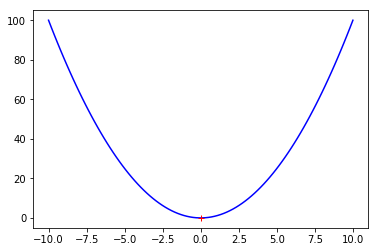

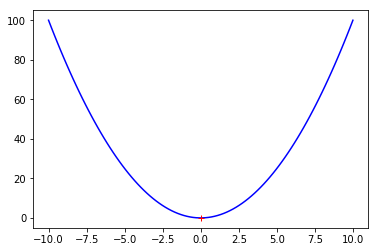

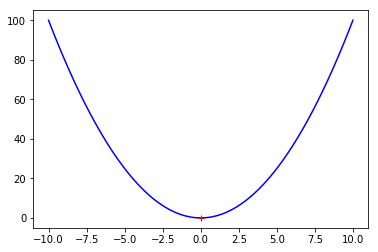

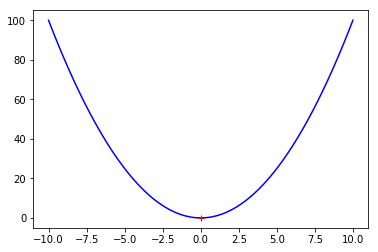

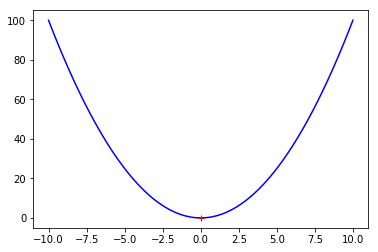

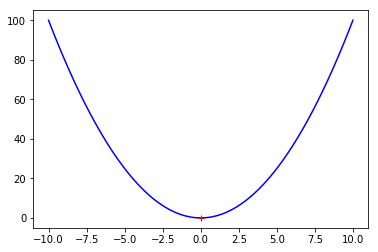

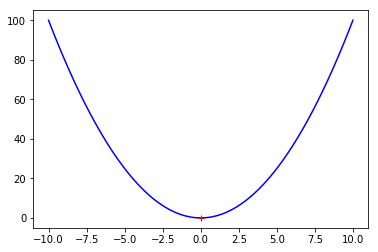

(-0.0003886458592449249, 43)

In [3]:
local_minimum(lambda x: x ** 2, lambda x: 2 * x, alpha = 0.1, plot=True)

# Linear Regression

In [4]:
def J(X, y, theta):
    """Calculates the cost function.

    Args:
        X: Feature matrix (m * n)
        Y: Target matrix (n)
    Returns:
        the cost.

    """
    m = X.shape[0]
    y_predicted = np.hstack((np.array([np.ones(m)]).T, X)).dot(theta.T)
    return np.sum((y_predicted - y) ** 2) / (2 * m)

In [5]:
def gradient_descent(X, y, alpha = 0.01, precision = 0.01, plot = False):
    """
    Calculates theta using gradient descent.
    """
    m = X.shape[0]
    costs = []
    
    # Randomly initialises weights.
    theta = np.random.rand(1,2)
    
    number_of_iterations = 0
    

    while number_of_iterations == 0 or (np.linalg.norm(theta_old - theta, axis=1)[0] > precision and number_of_iterations < 1000):
        costs.append(J(X, y, theta))
        theta_old = theta.copy()
        
        y_predicted = np.hstack((np.array([np.ones(m)]).T, X)).dot(theta.T)
        theta = theta - (alpha * np.sum((y_predicted - y) * X) / m)
        
        number_of_iterations += 1
        
        x = np.linspace(X[:, 0].min(), X[:, 0].max(), num = 10 * (X[:, 0].max() - X[:, 0].min()))
        
        if plot and X.shape[1] == 1:
            plt.scatter(X, y)
            plt.plot(x, np.apply_along_axis(np.vectorize(lambda x: theta[0, 0] + theta[0, 1] * x), 0, x), 'r')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('X vs y')
            plt.show()
        
    return theta, costs        

In [6]:
# Loading data
X = np.array([np.linspace(-10, 10, num = 100)]).T
y = 2 * X + np.array([np.random.normal(0, 5, 100)]).T

/home/abhishek/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


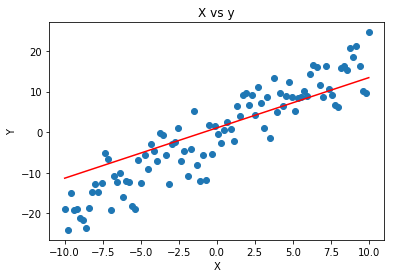

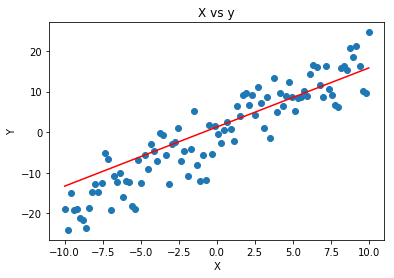

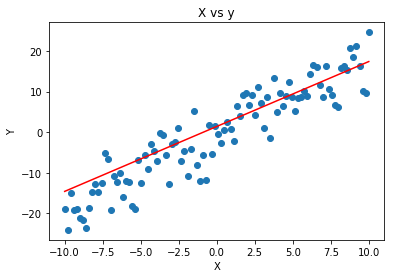

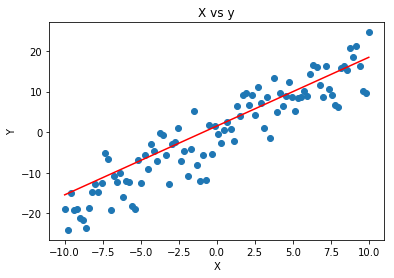

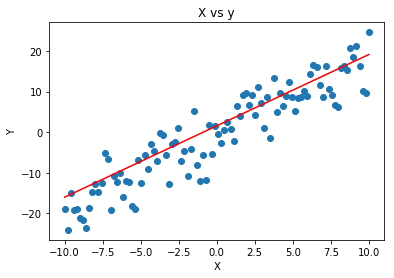

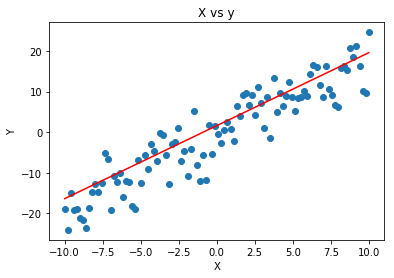

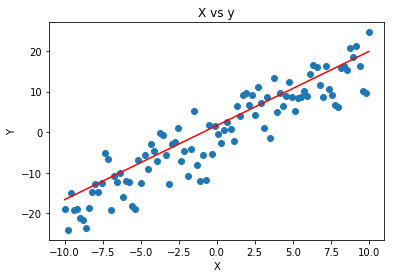

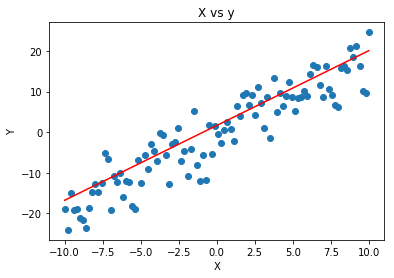

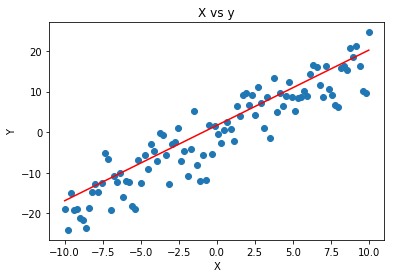

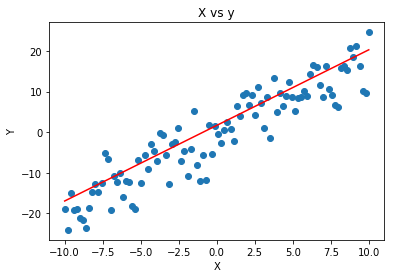

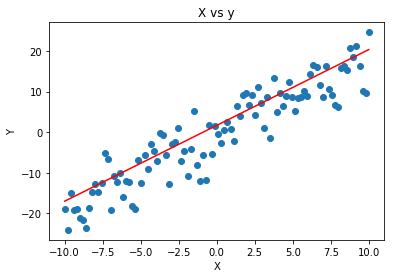

In [7]:
theta, costs = gradient_descent(X, y, plot = True)

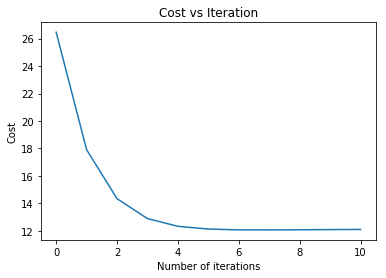

In [8]:
plt.plot(costs)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()